In [23]:
import os, shutil
import random

k = 5
data_number = 12500
base_dir = r'/Users/anli-chen/Documents/dogs-vs-cats/train1'
num_list = [i for i in range(data_number)]


random.shuffle(num_list)



In [24]:
train_base_dir = r'/Users/anli-chen/Documents/dogs-vs-cats/train_base'
if not os.path.isdir(train_base_dir): os.mkdir(train_base_dir)
validation_base_dir = r'/Users/anli-chen/Documents/dogs-vs-cats/validation_base'
if not os.path.isdir(validation_base_dir): os.mkdir(validation_base_dir)

cat_train_dir = os.path.join(train_base_dir,'cat')
if not os.path.isdir(cat_train_dir): os.mkdir(cat_train_dir)
dog_train_dir = os.path.join(train_base_dir,'dog')
if not os.path.isdir(dog_train_dir): os.mkdir(dog_train_dir)

cat_validation_dir = os.path.join(validation_base_dir,'cat')
if not os.path.isdir(cat_validation_dir): os.mkdir(cat_validation_dir)
dog_validation_dir = os.path.join(validation_base_dir,'dog')
if not os.path.isdir(dog_validation_dir): os.mkdir(dog_validation_dir)

train_list = [i for i in num_list[:(4*data_number//k)]]
validation_list = [i for i in num_list[4*data_number//k:data_number]]

fnames = ['cat.{}.jpg'.format(i) for i in train_list]
for fname in fnames:
    src = os.path.join(base_dir,fname)
    dst = os.path.join(cat_train_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in validation_list]
for fname in fnames:
    src = os.path.join(base_dir,fname)
    dst = os.path.join(cat_validation_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in train_list]
for fname in fnames:
    
    src = os.path.join(base_dir,fname)
    dst = os.path.join(dog_train_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in validation_list]
for fname in fnames:
    src = os.path.join(base_dir,fname)
    dst = os.path.join(dog_validation_dir,fname)
    shutil.copyfile(src,dst)

print(train_base_dir)
print(validation_base_dir)


/Users/anli-chen/Documents/dogs-vs-cats/train_base
/Users/anli-chen/Documents/dogs-vs-cats/validation_base


In [84]:
import keras
from keras import models, layers, Input,Model


input_tensor = (Input(batch_shape = (25, 130,130, 3)))
x_f = layers.Conv2D(32,(3,3),activation = 'relu')(input_tensor)
X_f = layers.MaxPooling2D(2,2)(x_f)
x_s = layers.Conv2D(64, (3,3),activation = 'relu')(x_f)
x_s = layers.MaxPooling2D(2,2)(x_s)
x_s = layers.Dropout(0.2)(x_s)
x_t = layers.Conv2D(128, (3,3),activation = 'relu')(x_s)
x_t = layers.MaxPooling2D(2,2)(x_t)
x_four = layers.Conv2D(128, (3,3),activation = 'relu')(x_t)
x_four = layers.MaxPooling2D(2,2)(x_four)
x_four = layers.Dropout(0.2)(x_four)
x_fi = layers.Conv2D(256, (3,3),activation = 'relu')(x_four)
x_fi = layers.MaxPooling2D(2,2)(x_fi)
x_six = layers.Dense(256,activation = 'relu')(x_fi)


residual = layers.Conv2D(128,(1,1),strides=2,padding='same')(x_f)
residual = layers.Conv2D(128,(1,1),strides=2,padding='same')(residual)
residual = layers.Conv2D(256,(1,1),strides=2,padding='same')(residual)
residual = layers.Conv2D(256,(1,1),strides=3,padding='same')(residual)


print(residual.shape)

op = layers.add([x_six,residual])
op = layers.Flatten()(op)
op = layers.Dropout(0.5)(op)
dense = layers.Dense(512,activation = 'relu')(op)
output_tensor = layers.Dense(1, activation = 'sigmoid')(dense)



print(op.shape)
model = Model(input_tensor, output_tensor)
model.summary()





(25, 6, 6, 256)
(25, 9216)
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(25, 130, 130, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (25, 128, 128, 32)   896         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (25, 126, 126, 64)   18496       conv2d_95[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_51 (MaxPooling2D) (25, 63, 63, 64)     0           conv2d_96[0][0]                  
_________________________________________________________________

In [93]:
from keras.preprocessing.image import ImageDataGenerator as idg

test_dir = r'/Users/anli-chen/Documents/dogs-vs-cats/test1'

train_datagen = idg(rescale=1./255)
test_datagen = idg(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_base_dir,
    target_size= (130,130),
    batch_size=25,
    class_mode= 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_base_dir,
    target_size = (130,130),
    batch_size= 25,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (130,130),
    batch_size=1,
    class_mode='binary'
    )




Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


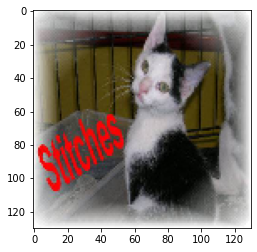

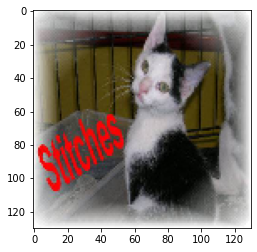

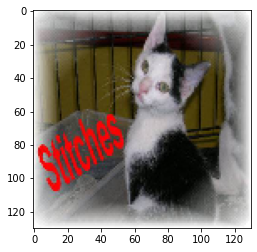

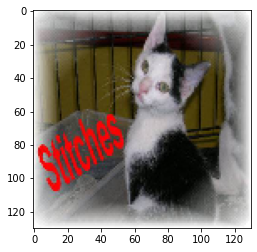

In [75]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import random as rd

fnames = [os.path.join(cat_train_dir,fname) for fname in os.listdir(cat_train_dir)]
img_path = fnames[rd.randint(1,1000)]

img = image.load_img(img_path,target_size = (130,130))
x = image.img_to_array(img)
x=x.reshape((1, )+x.shape )
i = 0
for batch in train_datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

        
plt.show()

In [86]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate = 1e-4),
             metrics = ['acc'])

In [87]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 25,
    epochs = 450,
    validation_data = validation_generator,
    validation_steps = 25
    )

Epoch 1/450
25/25 [==============================] - 44s 2s/step - loss: 0.7000 - acc: 0.5355 - val_loss: 0.6948 - val_acc: 0.4752
Epoch 2/450
25/25 [==============================] - 39s 2s/step - loss: 0.6937 - acc: 0.5081 - val_loss: 0.6809 - val_acc: 0.5472
Epoch 3/450
25/25 [==============================] - 40s 2s/step - loss: 0.6922 - acc: 0.5216 - val_loss: 0.6822 - val_acc: 0.5360
Epoch 4/450
25/25 [==============================] - 40s 2s/step - loss: 0.6815 - acc: 0.5441 - val_loss: 0.6801 - val_acc: 0.5936
Epoch 5/450
25/25 [==============================] - 41s 2s/step - loss: 0.6767 - acc: 0.5743 - val_loss: 0.6720 - val_acc: 0.5904
Epoch 6/450
25/25 [==============================] - 41s 2s/step - loss: 0.6765 - acc: 0.5822 - val_loss: 0.6698 - val_acc: 0.6064
Epoch 7/450
25/25 [==============================] - 41s 2s/step - loss: 0.6688 - acc: 0.6015 - val_loss: 0.6846 - val_acc: 0.5648
Epoch 8/450
25/25 [==============================] - 41s 2s/step - loss: 0.6588 - a

In [98]:
model.save('model_cat_and_dog.h1')

INFO:tensorflow:Assets written to: model_cat_and_dog.h1/assets


/Users/anli-chen/opt/anaconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


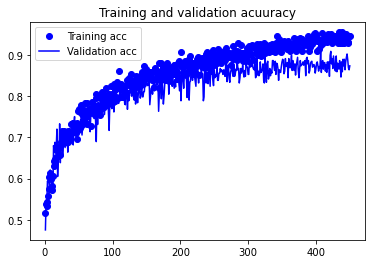

In [91]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acuuracy')
plt.legend()

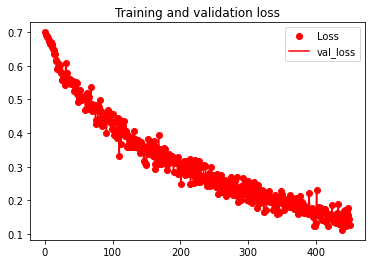

In [92]:
plt.plot(epochs,loss,'ro',label='Loss')
plt.plot(epochs,loss,'r',label='val_loss')
plt.title('Training and validation loss')
plt.legend()

This model is 1.63 percent confident that the picture is cat
This model is 98.37 percent confident that the picture is dog


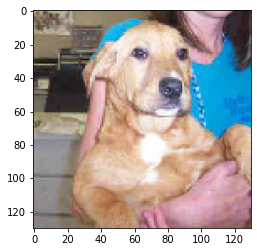

In [151]:
import numpy as np

fnames = [os.path.join(test_dir,fname) for fname in os.listdir(test_dir)]
img_path = fnames[rd.randint(1,10000)]
test_img = image.load_img(img_path,target_size =(130,130))
plt.imshow(test_img)


model.load_weights("model_cat_and_dog.h1")
prediction = model.predict(validation_generator,steps=1)[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["cat", "dog"]
for score, name in zip(scores, class_names):
    print(
        "This model is %.2f percent confident that the picture is %s"
        % ((100 * score), name)
    )